# Breast Cancer prediction through routine blood work
The goal of this exploratory study was to develop and assess a prediction model which can potentially
be used as a biomarker of breast cancer, based on anthropometric data and parameters which can be gathered in
routine blood analysis.

Ref:Patrício M, et al. Using Resistin, glucose, age and BMI to predict the presence of breast cancer BMC Cancer (2018) 18:29

# Data Sources
The data from 116 patients with 10 features e will be used for this study.  The study is documented on the UCI ML dataset (https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra) and data will be requested from the corresponding author of the study Dr. Miguel Patricio, Laboratory of Biostatistics and Medical Informatics and IBILI - Faculty of Medicine, University of Coimbra, Azinhaga Santa Comba, Celas, 3000-548 Coimbra, Portugal.


# Data Set Information:

There are 10 predictors, all quantitative, and a binary dependent variable, indicating the presence or absence of breast cancer. 
The predictors are anthropometric data and parameters which can be gathered in routine blood analysis. 
Prediction models based on these predictors, if accurate, can potentially be used as a biomarker of breast cancer.




# Attribute Information:

Quantitative Attributes: Age (years) BMI (kg/m2) Glucose (mg/dL) Insulin (µU/mL) HOMA Leptin (ng/mL) Adiponectin (µg/mL) Resistin (ng/mL) MCP-1(pg/dL)

##Labels: 1=Healthy controls 2=Patients

# Packages and Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt

# Data download and initial observation

In [2]:
blood_analysis = pd.read_csv('Bloodwork_BC.csv')
blood_analysis.shape ##(116, 10)
blood_analysis.columns

Index(['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin',
       'Resistin', 'MCP.1', 'Classification'],
      dtype='object')

In [3]:
blood_analysis.head(5)

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [4]:
blood_analysis.describe()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000,1.551724
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663,0.499475
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,1.000000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474282,6.881763,269.978250,1.000000
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500,2.000000
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000,2.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000,2.000000


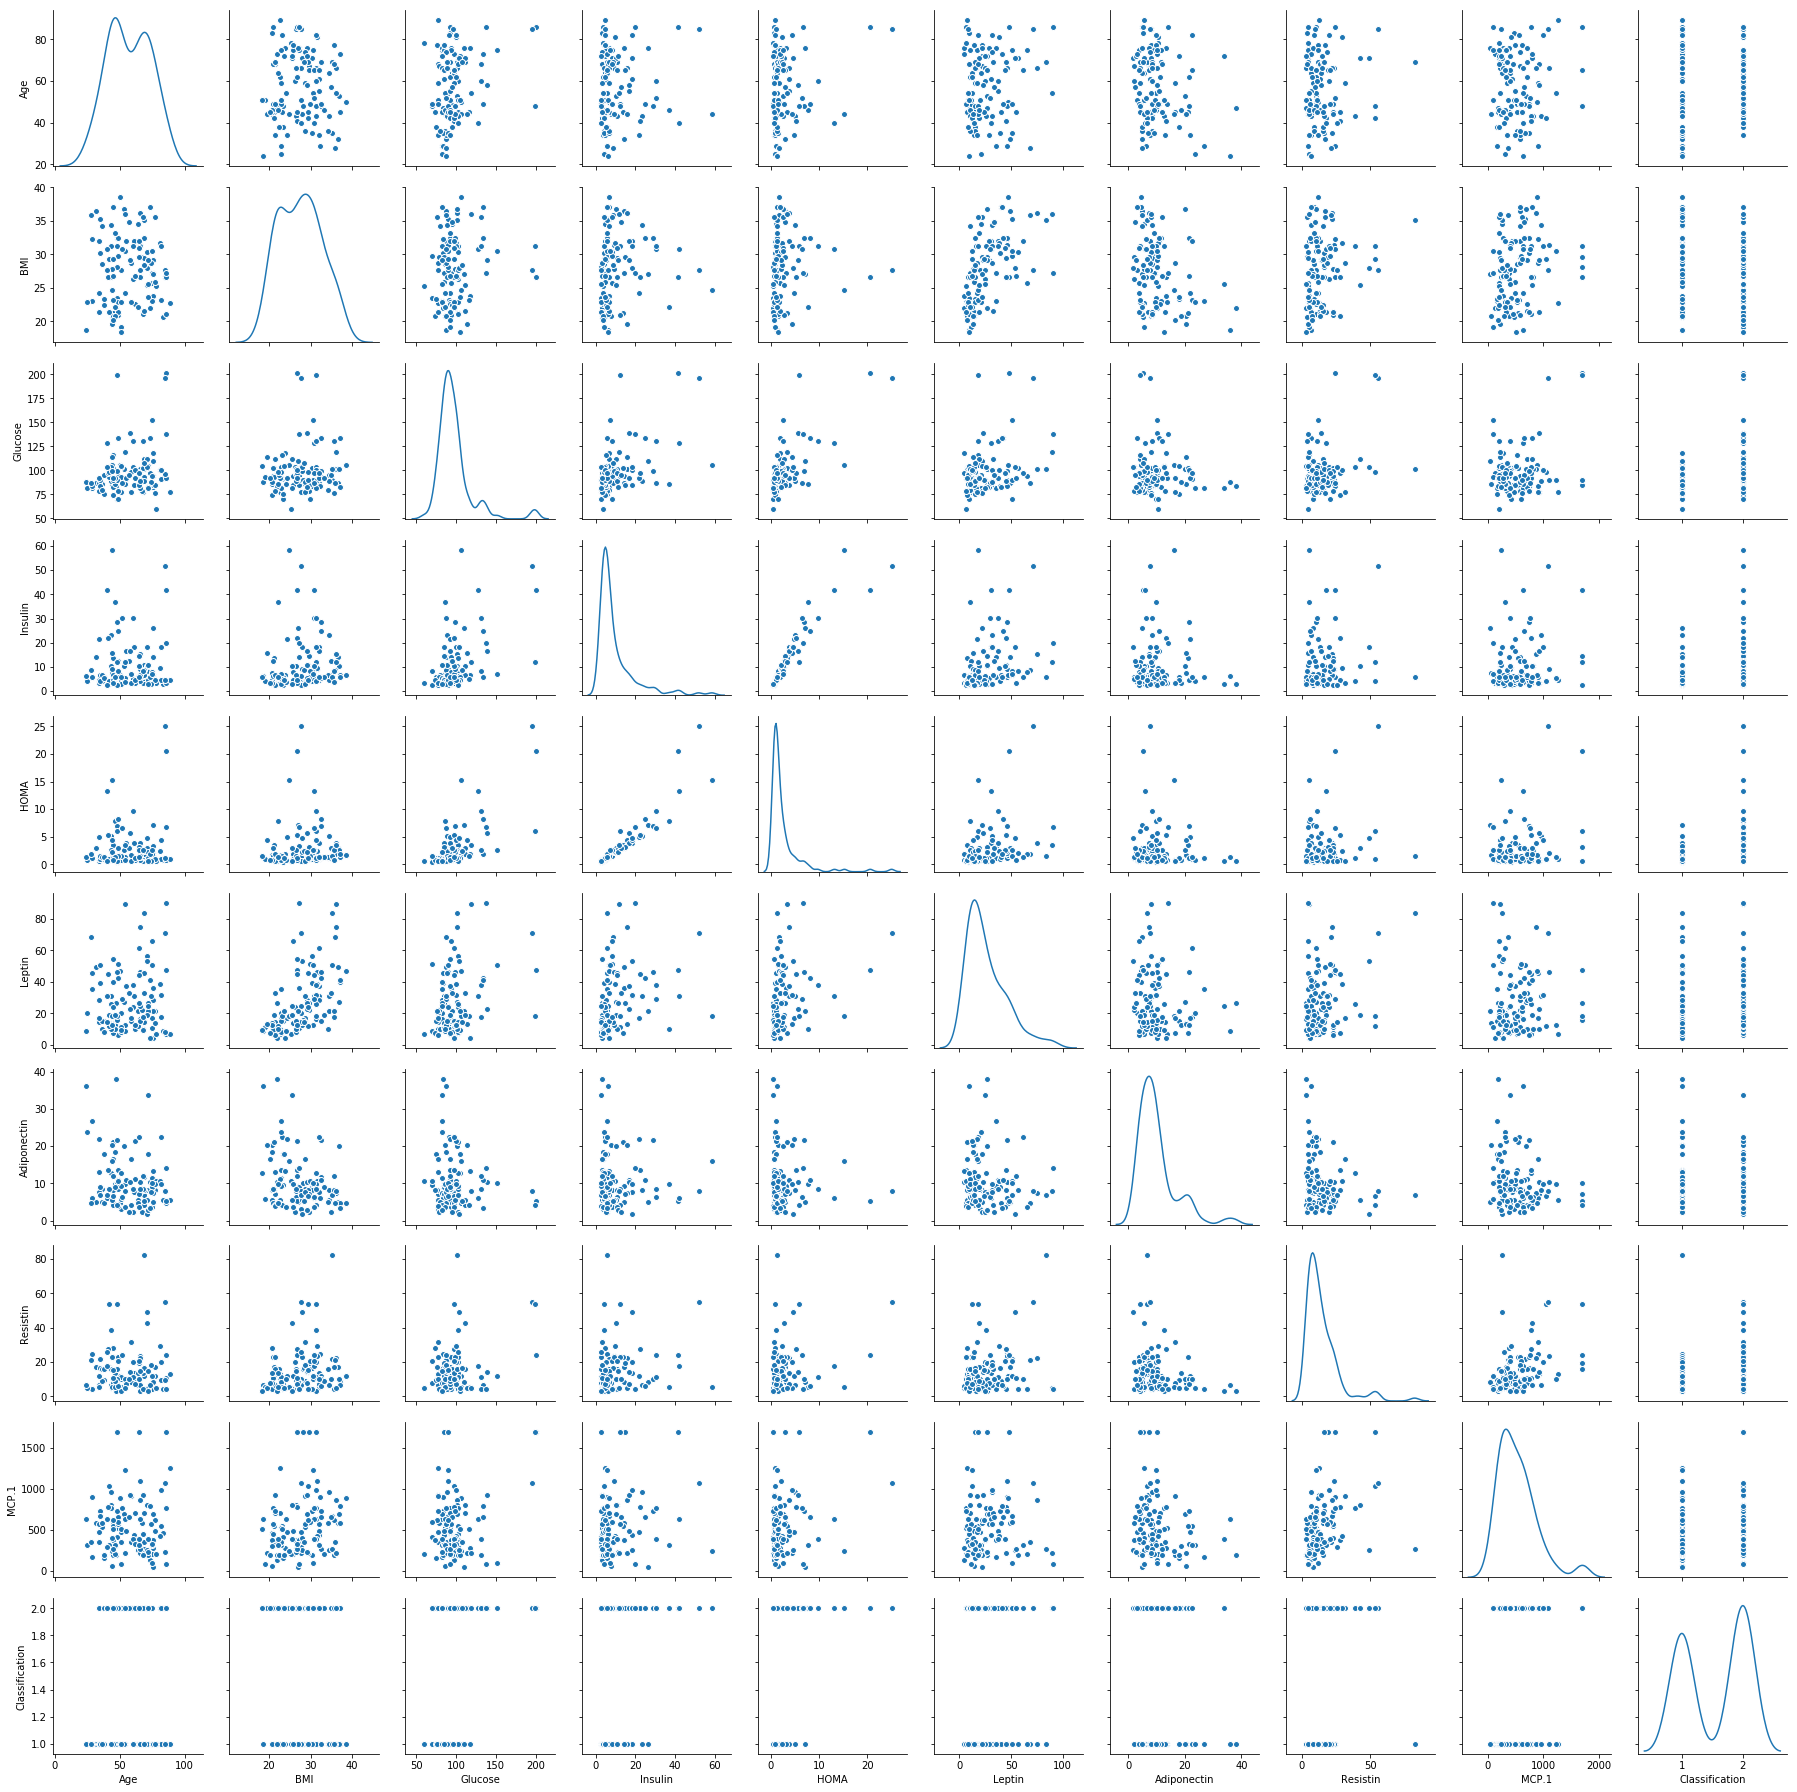

In [5]:
g1 = sns.pairplot(blood_analysis, diag_kind="kde")

Looking at the pair plots the corelation between the Classification and Glucose, Insulin, HOMA and Resistin there looks like a effect of these levels on the onset of cancer.

In [6]:
data = blood_analysis

#creating a column from classification to alphabets Labels
data['Label'] = np.where(data['Classification']==1, 'H', 'P')
print(data.head())

# y includes our labels and x includes our features
y1 = data.Label                          # 1 or 2 

x = data
x.head(20)

   Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  Resistin  \
0   48  23.500000       70    2.707  0.467409   8.8071     9.702400   7.99585   
1   83  20.690495       92    3.115  0.706897   8.8438     5.429285   4.06405   
2   82  23.124670       91    4.498  1.009651  17.9393    22.432040   9.27715   
3   68  21.367521       77    3.226  0.612725   9.8827     7.169560  12.76600   
4   86  21.111111       92    3.549  0.805386   6.6994     4.819240  10.57635   

     MCP.1  Classification Label  
0  417.114               1     H  
1  468.786               1     H  
2  554.697               1     H  
3  928.220               1     H  
4  773.920               1     H  


,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification,Label
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1,H
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1,H
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1,H
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1,H
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1,H
5,49,22.854458,92,3.226,0.732087,6.8317,13.679750,10.31760,530.410,1,H
6,89,22.700000,77,4.690,0.890787,6.9640,5.589865,12.93610,1256.083,1,H
7,76,23.800000,118,6.470,1.883201,4.3110,13.251320,5.10420,280.694,1,H
8,73,22.000000,97,3.350,0.801543,4.4700,10.358725,6.28445,136.855,1,H
9,75,23.000000,83,4.952,1.013839,17.1270,11.578990,7.09130,318.302,1,H


Number of Healthy:  64
Number of Patients :  52


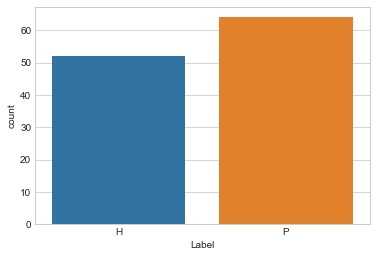

In [23]:
ax = sns.countplot(y1,label="Count")       # M = 212, B = 357
H, P = y1.value_counts()
print('Number of Healthy: ', H)
print('Number of Patients : ',P)

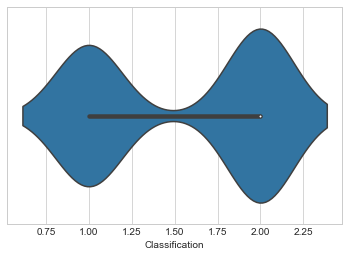

In [8]:
sns.set_style("whitegrid")
ax = sns.violinplot(x=blood_analysis["Classification"])
# ax = sns.violinplot(x=blood_analysis["Glucose"])

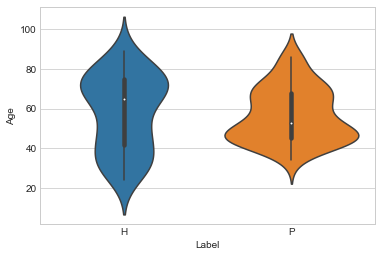

In [9]:
ax = sns.violinplot(x="Label", y="Age", data=blood_analysis)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

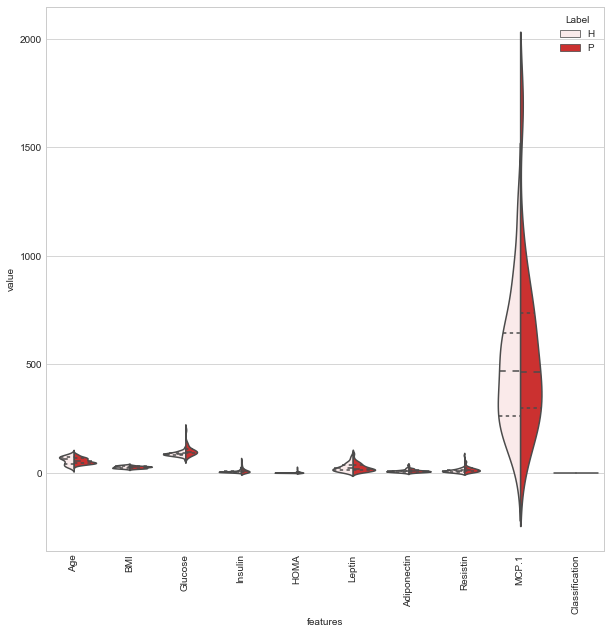

In [24]:

data = pd.melt(blood_analysis,id_vars="Label",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="Label", data=data,split=True, inner="quart", color="#e51716")
plt.xticks(rotation=90)

The values are ver far away for the various columns especially the MCP.1 we need standarization of the data

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

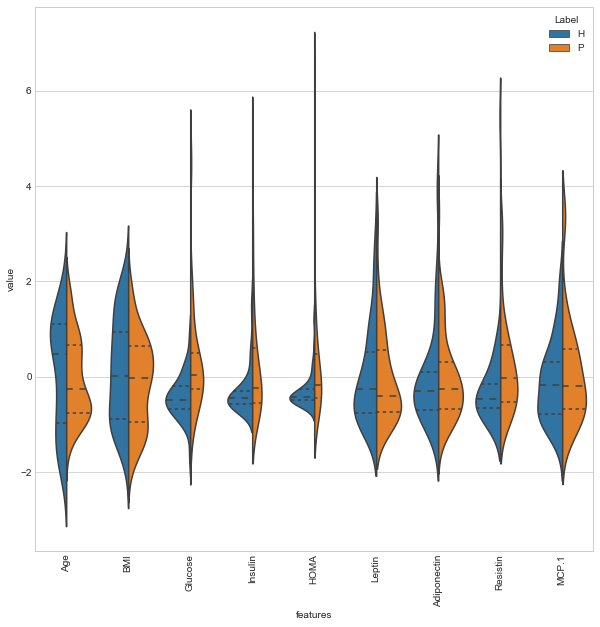

In [11]:
#DATA standarization
y = blood_analysis.Label
x = blood_analysis.drop(["Classification", "Label"], axis=1)

data_n_2 = (x - x.mean()) / (x.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="Label",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="Label", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

Lets interpret the plot above. For example, in Age, Glucose feature, median of the healthy and patient looks like separated so it can be good for classification. However, in MCP.1 feature, median of the healthy and patient does not looks like separated so it does not gives good information for classification.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

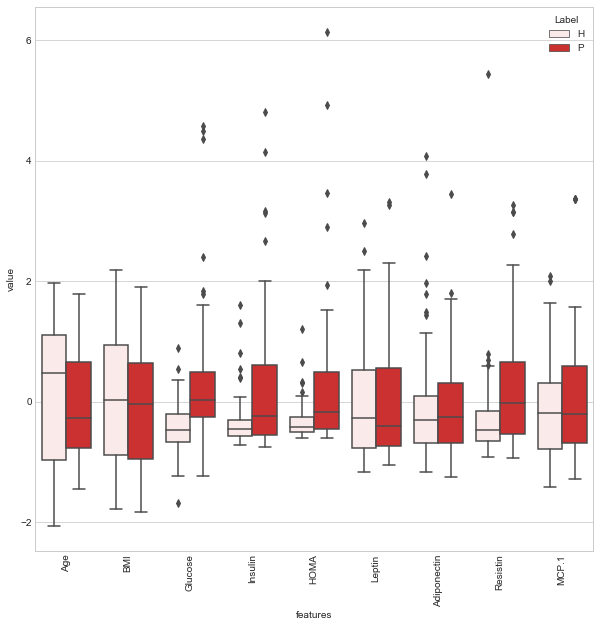

In [21]:
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="Label", data=data, color="#e51716")
plt.xticks(rotation=90)

Looking at the pair plots the corelation between the Classification and Age, Glucose, Insulin, HOMA and Resistin there looks like a effect of these levels on the onset of cancer.

Lets interpret one more thing about plot above, variable of Glucose and Resistin,, and Insulin and HOMA  looks like similar but how can we decide whether they are correlated with each other or not. (Not always true but, basically if the features are correlated with each other we can drop one of them)

In order to compare two features deeper, lets use joint plot. 

/Users/smitaupadhyay/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


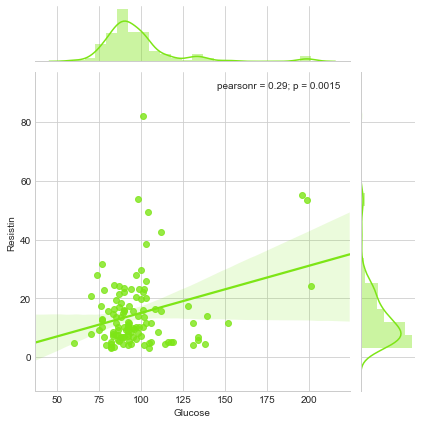

In [18]:
sns.jointplot(x.loc[:,'Glucose'], x.loc[:,'Resistin'], kind="regg", color="#7de516")

# RESISTIN AND Glucose
Look at this in joint plot below, it is not really correlated. Pearsonr value is correlation value and 1 is the highest. Therefore, 0.29 is not enough to say that they are correlated. Do not forget, we are not choosing features yet, we are just looking to have an idea about them.

/Users/smitaupadhyay/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


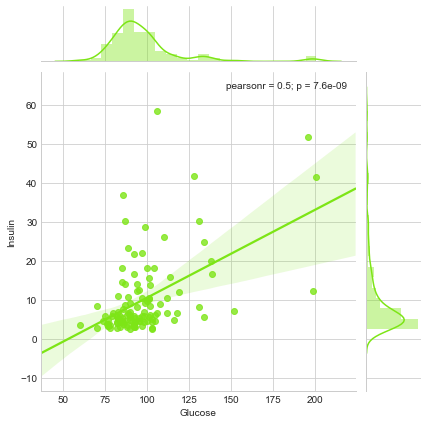

In [25]:
sns.jointplot(x.loc[:,'Glucose'], x.loc[:,'Insulin'], kind="regg", color="#7de516")

# Glucose AND INSULIN
Look at this in joint plot below, it is somewhat correlated. Pearsonr value is correlation value and 1 is the highest. Therefore, 0.5 is  not enough to say that they are correlated. Do not forget, we are not choosing features yet, we are just looking to have an idea about them.

/Users/smitaupadhyay/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


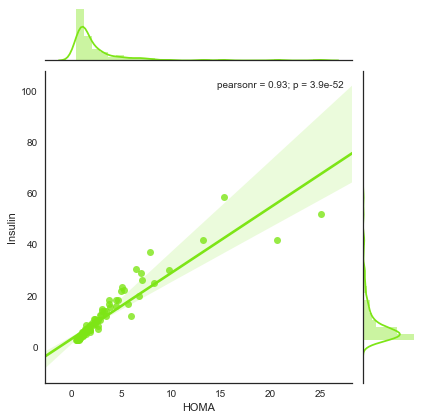

In [42]:
sns.jointplot(x.loc[:,'HOMA'], x.loc[:,'Insulin'], kind="regg", color="#7de516")



# HOMA AND INSULIN
Look at this in joint plot below, it is really correlated. Pearsonr value is correlation value and 1 is the highest. Therefore, 0.93 is  enough to say that they are correlated. Do not forget, we are not choosing features yet, we are just looking to have an idea about them.

/Users/smitaupadhyay/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


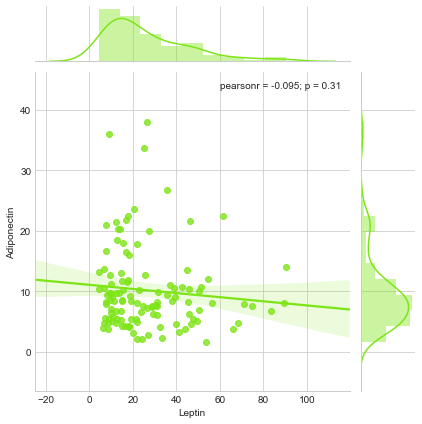

In [27]:
sns.jointplot(x.loc[:,'Leptin'], x.loc[:,'Adiponectin'], kind="regg", color="#7de516")

/Users/smitaupadhyay/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


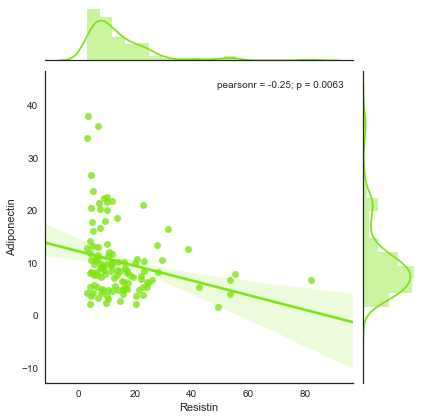

In [35]:
sns.jointplot(x.loc[:,'Resistin'], x.loc[:,'Adiponectin'], kind="regg", color="#7de516")

In [31]:
x.columns

Index(['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin',
       'Resistin', 'MCP.1'],
      dtype='object')

/Users/smitaupadhyay/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


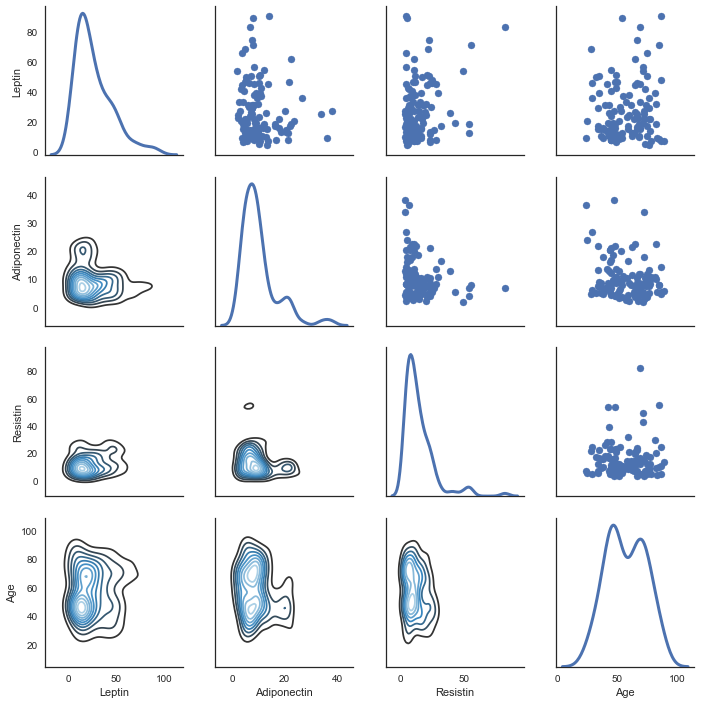

In [36]:
sns.set(style="white")
df = x.loc[:,['Leptin','Adiponectin','Resistin','Age']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

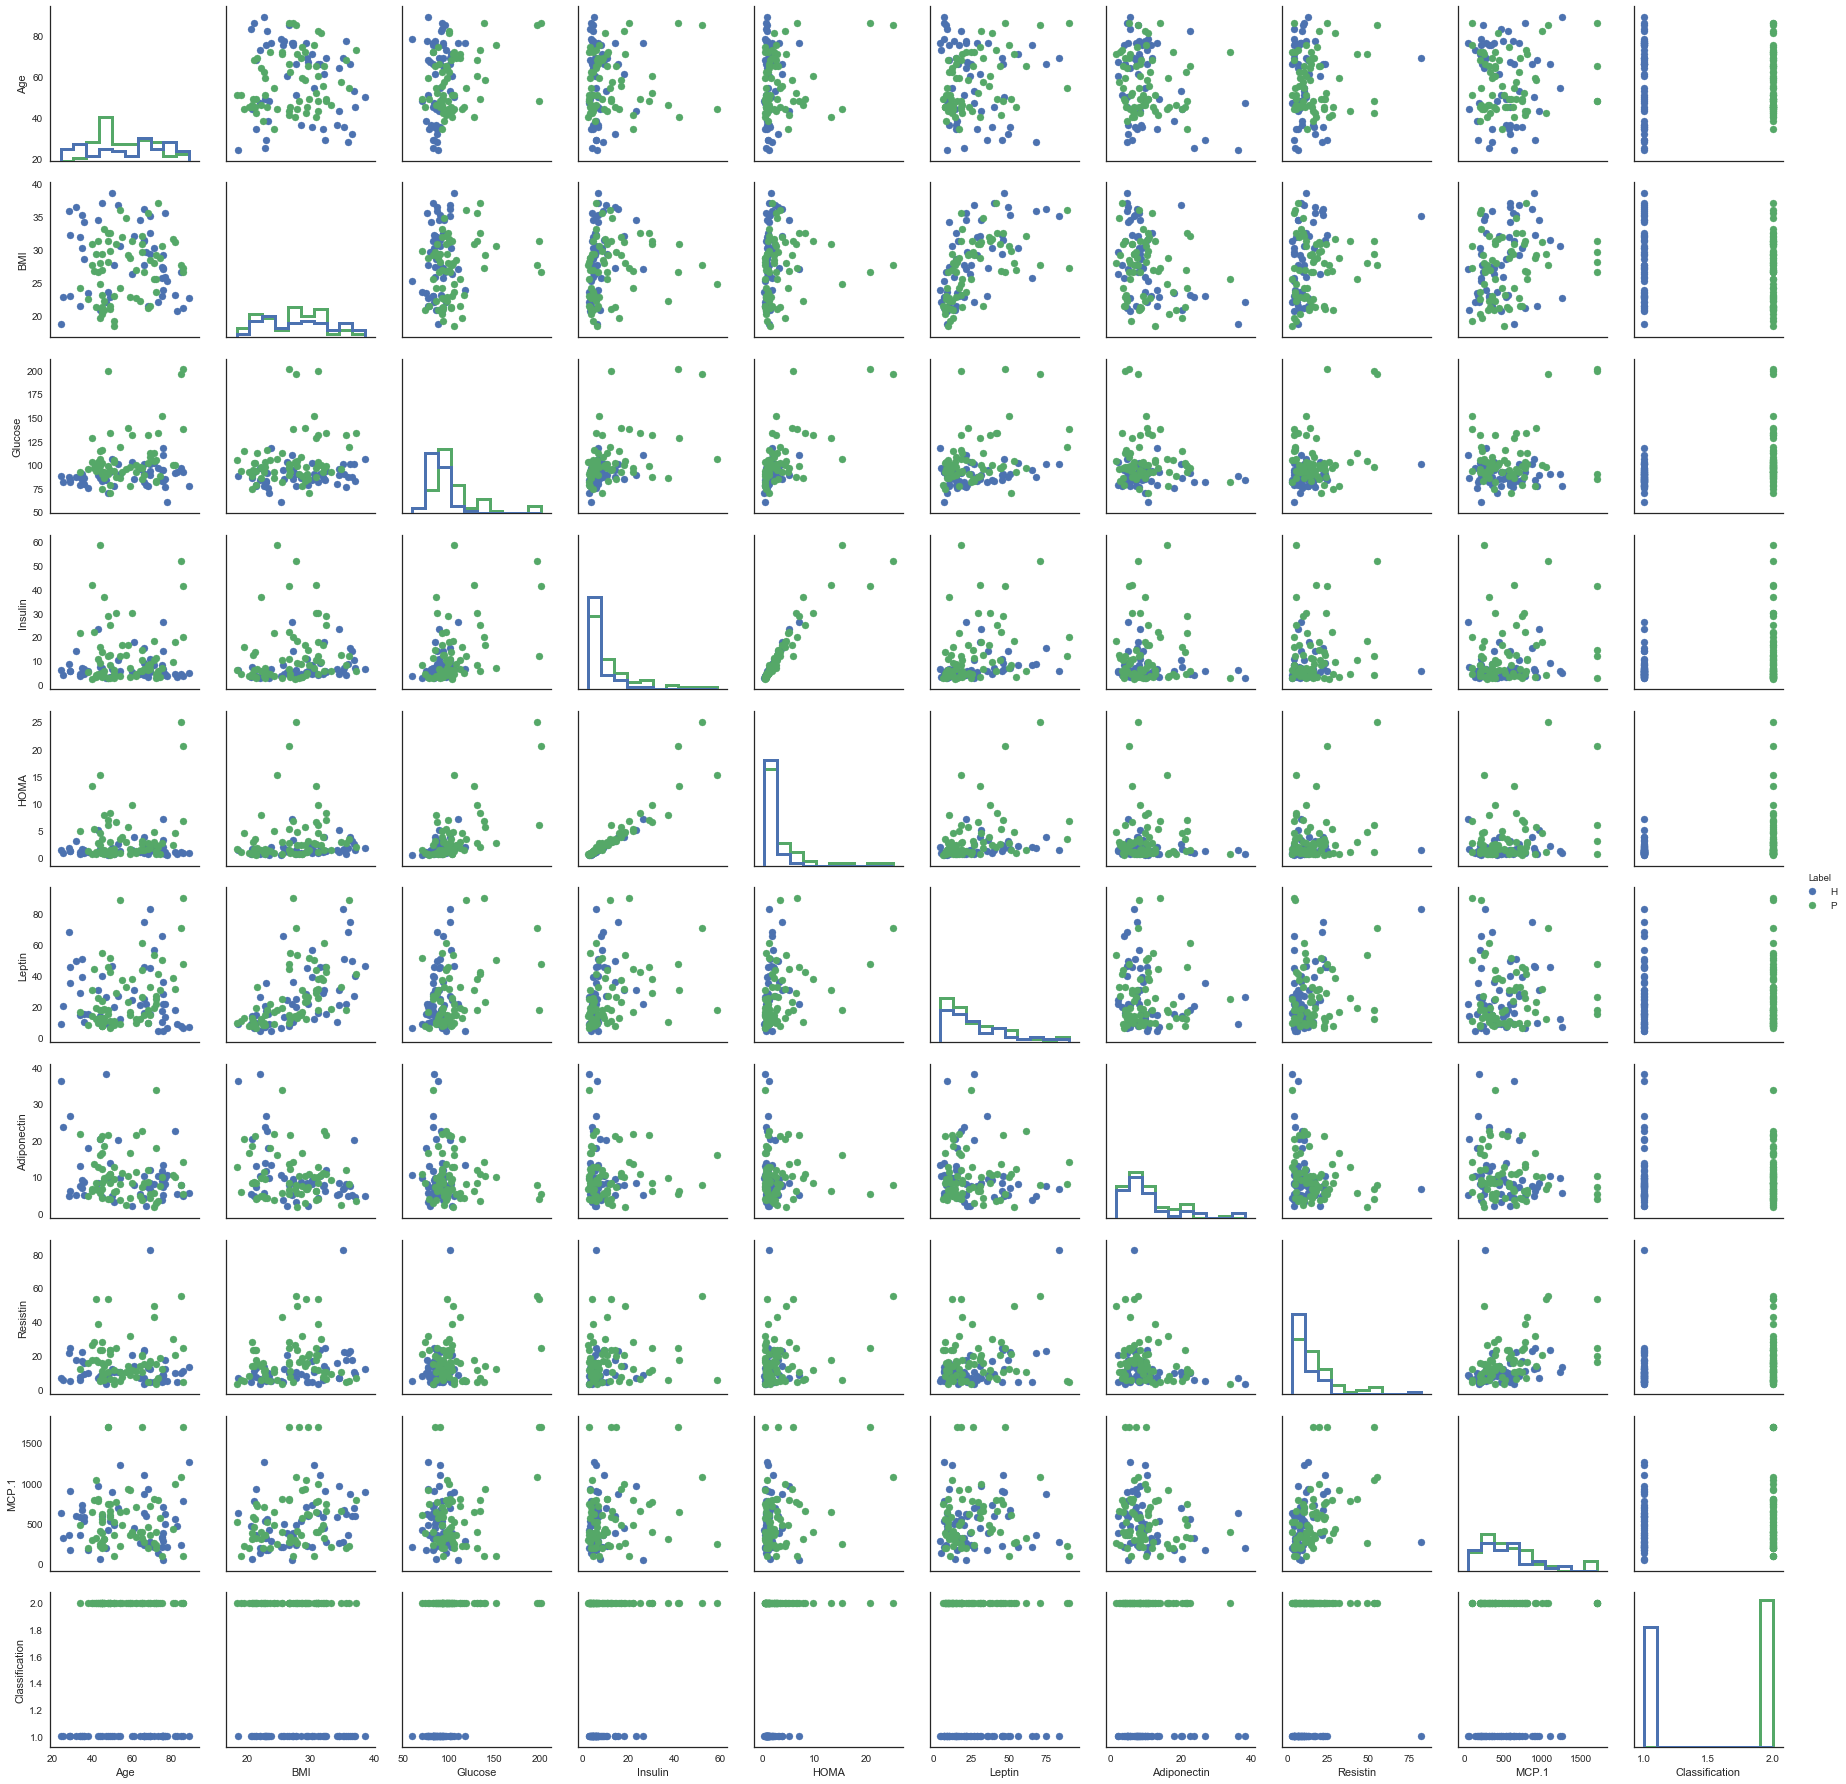

In [41]:
g = sns.PairGrid(blood_analysis, hue="Label")
g = g.map_diag(plt.hist, histtype="step", linewidth=3)
g = g.map_offdiag(plt.scatter)
g = g.add_legend()

In [43]:
#Random Sampling
from scipy import stats
import pandas as pd

def h2f(df, n):
    for index, row in df.iterrows(): 
        list1 = []
        nr = df.as_matrix()
        ff = stats.norm.rvs(loc=nr[index,2], scale=nr[index,3], size = n)
        list1.append(ff)
     return list1

# df2 = h2f(data, 100)
# pd.DataFrame(df2)

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 11)

In [44]:
import io
from scipy import stats
import pandas as pd

def h2f(df, n):
    list1 = []
    for index, row in df.iterrows(): 
        mean, std = row['hmean'], row['hstd']
        ff = stats.norm.rvs(loc=mean, scale=std, size=n)
        list1.append(ff)
    return list1

# content = '''\
#      Name      amax        hmean       hstd         amin
# 0    Bill    22.924545   22.515861   0.375822    22.110000
# 1    Bob     26.118182   24.713880   0.721507    23.738400
# 2    Becky   23.178606   22.722464   0.454028    22.096752'''

# df = pd.read_table(io.BytesIO(content), sep='\s+')
# df2 = pd.DataFrame(h2f(df, 100))
# print(df2)